In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

1.0 0.0
1.0 0.0


In [4]:
model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1),filters = 32, kernel_size = 3, padding = 'SAME', activation = 'relu', use_bias = True))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, padding = 'SAME', kernel_size = 3, activation = 'relu', use_bias = True))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128, padding = 'SAME', kernel_size = 3, activation = 'relu', use_bias = True))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

In [5]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
hist = model.fit(x_train.reshape(-1, 28, 28, 1), t_train, batch_size = 50, epochs = 50, validation_split = 0.2)

Epoch 1/50
960/960 [==============================] - 4s 4ms/step - loss: 0.3822 - accuracy: 0.8746 - val_loss: 0.0863 - val_accuracy: 0.9745
Epoch 2/50
960/960 [==============================] - 4s 4ms/step - loss: 0.1301 - accuracy: 0.9591 - val_loss: 0.0550 - val_accuracy: 0.9834
Epoch 3/50
960/960 [==============================] - 4s 4ms/step - loss: 0.1023 - accuracy: 0.9676 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 4/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0904 - accuracy: 0.9722 - val_loss: 0.0365 - val_accuracy: 0.9895
Epoch 5/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0790 - accuracy: 0.9746 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 6/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0333 - val_accuracy: 0.9903
Epoch 7/50
960/960 [==============================] - 4s 4ms/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 

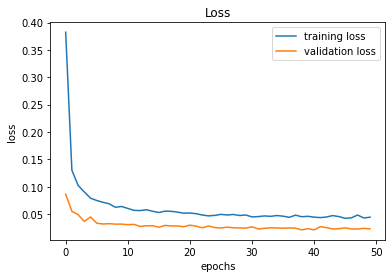

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

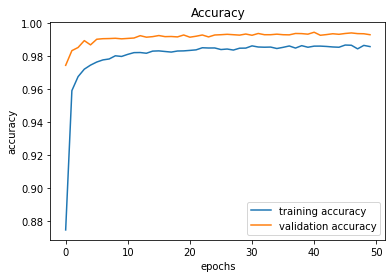

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

# 6번

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1), filters = 32, kernel_size = 3, activation = 'relu', strides = (1, 1), padding = 'SAME'))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', strides = (1, 1), padding = 'SAME'))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'SAME'))

model.add(Flatten())
model.add(Dense(20, activation = 'tanh'))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 20)               

In [ ]:
hist = model.fit(x_train.reshape(-1, 28, 28, 1), t_train, validation_split = 0.2, verbose = 2, epochs = 30)

Epoch 1/30
1500/1500 - 4s - loss: 0.0548 - accuracy: 0.9842 - val_loss: 0.0514 - val_accuracy: 0.9847 - 4s/epoch - 3ms/step
Epoch 2/30
1500/1500 - 5s - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.0472 - val_accuracy: 0.9865 - 5s/epoch - 3ms/step
Epoch 3/30
1500/1500 - 6s - loss: 0.0256 - accuracy: 0.9928 - val_loss: 0.0419 - val_accuracy: 0.9872 - 6s/epoch - 4ms/step
Epoch 4/30
1500/1500 - 5s - loss: 0.0202 - accuracy: 0.9942 - val_loss: 0.0407 - val_accuracy: 0.9880 - 5s/epoch - 4ms/step
Epoch 5/30
1500/1500 - 6s - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0421 - val_accuracy: 0.9876 - 6s/epoch - 4ms/step
Epoch 6/30
1500/1500 - 5s - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0336 - val_accuracy: 0.9902 - 5s/epoch - 3ms/step
Epoch 7/30
1500/1500 - 5s - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0442 - val_accuracy: 0.9879 - 5s/epoch - 3ms/step
Epoch 8/30
1500/1500 - 4s - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0404 - val_accuracy: 0.9896 - 4s/epoch - 3ms/step
Epoch 9/

In [ ]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0436 - accuracy: 0.9897


[0.04358784109354019, 0.9897000193595886]